In [1]:
#Esercizio 1

def convertNumRepresentation(num, newtype):
    #fornire newtype: dec = decimale, bin = binario, hex = esadecimale
    if isinstance(num,float):
        raise ValueError('You cannot use this function in order to convert floating point numbers')
    else:
        if isinstance(num,str): #è binario o esadecimale
            if num.startswith('0b'):
                oldtype = 'bin'
                try: 
                    num = int(num,2)
                except: 
                    raise ValueError('The input is not correct')
            elif num.startswith('0x'):
                oldtype = 'hex'
                try:
                    num = int(num, 16)
                except:
                    raise Error('The input is not correct')
        else:
            oldtype = 'dec'
        
        if oldtype != newtype:
            if newtype == 'dec':
                return num
            elif newtype == 'bin':
                return bin(num)
            else:
                return hex(num)
        else:
            return num
            

#Test
a = bin(23)
b = 23
c = hex(23)

print('Binario in Intero: ', a, str(b), convertNumRepresentation(a,'dec'))
print('Intero in Binario: ',  str(b), a, convertNumRepresentation(b,'bin'))
print('Binario in Esadecimale: ', a, c, convertNumRepresentation(a,'hex'))
print('Esadecimale in binario:', c, a, convertNumRepresentation(c,'bin'))
print('Intero in esadecimale: ',b, c, convertNumRepresentation(b,'hex'))
print('Esadecimale in Intero: ', c, b, convertNumRepresentation(c, 'dec'))

Binario in Intero:  0b10111 23 23
Intero in Binario:  23 0b10111 0b10111
Binario in Esadecimale:  0b10111 0x17 0x17
Esadecimale in binario: 0x17 0b10111 0b10111
Intero in esadecimale:  23 0x17 0x17
Esadecimale in Intero:  0x17 23 23


In [18]:
#Esercizio 2:

def singlePrecisionFloat(binstr):
    bias = 127
    
    #primo bit = segno
    if int(binstr[0]) == 0: 
        s = +1
    else:
        s = -1
    
    #bit dall'1 all'8 = esponente
    espon = binstr[1:9] 
    espon = '0b'+str(espon) #OK
    e = int(espon,2)
    print(e)
    #mantissa da 9 a 32
    mantissa = binstr[9:32] 
    #mantissa = '0b'+ str(mantissa) 
    f = 1
    i = 1
    for m in mantissa:
        f += int(m)/(2**i)
        i += 1
    print(f)
    #Ricostruisco il numero in singola precisione
    float_num = (s*f*(2**(e-bias)))
    return float_num

#Test
a = '00000011111000000000000000000000'
b = '11000000101100000000000000000000'
f_num = singlePrecisionFloat(b)
print(f_num)

129
1.375
-5.5


In [19]:
#Esercizio 3

underflow = 1.0
overflow = 1.0
up_limit = False
down_limit = False

#Calcolo l'overflow
while not up_limit:
    overflow_new = overflow*2
    if overflow_new == float('inf'):
        up_limit = True
    else:
        overflow = overflow_new

print('The overflow for floating point in my computer is: ', overflow)

#Calcolo l'underflow
while not down_limit:
    underflow_new = underflow/2
    if underflow_new == float(0.0):
        down_limit = True
    else:
        underflow = underflow_new

print('The underflow for floating point in my computer is: ', underflow)

#Trasformo in funzioni

def findOverflow():
    overflow = 1.0
    up_limit = False
    while not up_limit:
        overflow_new = overflow*2
        if overflow_new == float('inf'):
            up_limit = True
        else:
            overflow = overflow_new
    return overflow

def findUnderflow():
    underflow = 1.0
    down_limit = False
    while not down_limit:
        underflow_new = underflow/2
        if underflow_new == float(0.0):
            down_limit = True
        else:
            underflow = underflow_new
    return underflow

print(findOverflow())
print(findUnderflow())

The overflow for floating point in my computer is:  8.98846567431158e+307
The underflow for floating point in my computer is:  5e-324
8.98846567431158e+307
5e-324


In [20]:
#Esercizio 4

a = 4.5
epsilon = 0.001
accuracy = True

while accuracy:
    if a + epsilon == a:
        accuracy = False
    else:
        epsilon = epsilon/10

print('The machine precision is in the order of: ', epsilon)

#Trasformo in una funzione

def machinePrecision():
    a = 4.5
    epsilon = 0.001
    accuracy = True
    
    while accuracy:
        if a + epsilon == a:
            accuracy = False
        else:
            epsilon = epsilon/10
    
    return epsilon


The machine precision is in the order of:  1.0000000000000001e-16


In [27]:
# Esercizio 5
import math

def quadraticSolution_a(a,b,c):
    #ritorna la soluzione di ax^2 + bx + c = 0
    delta = b*b - 4*a*c
    if delta < 0:
        print('There is no solution to the system')
        return
    elif delta == 0:
        print('The system is indeterminate')
        return
    else:
        x1 = (- b - math.sqrt(delta)) / 2*a
        x2 = (- b + math.sqrt(delta)) / 2*a
        return x1, x2

a = 0.001
b = 1000
c = 0.001

print(quadraticSolution_a(a,b,c))

def quadraticSolution_b(a,b,c):
    delta = b*b - 4*a*c
    if delta < 0:
        print('There is no solution to the system')
        return
    elif delta == 0:
        print('The system is indeterminate')
        return
    else:
        x1 =  2*c / (-b + math.sqrt(delta))
        x2 = 2*c / (- b - math.sqrt(delta))
        return x1, x2

print(quadraticSolution_b(a,b,c))

#Per prima cosa, notiamo che, essendo a e c molto piccole, il loro prodotto sarà molto << b^2. Di conseguenga 
# la radice di delta sarà molto simile a b (non c'entra)

# Nel primo caso, trovandosi la radice quadrata di un floating point al numeratore, piccole variazioni
# di tale floating point (a causa della machine precision nella rappresentazione di numeri in virgola mobile),
# si riverbera in piccole variazioni del risultato finale

#Invece, nel secondo caso, trovandosi la radice quadrata di un floating point al denominatore, piccole variazioni
# di tale floating point (a causa della machine precision nella rappresentazione di numeri in virgola mobile),
# sono sufficienti a produrre elevate modificazioni del risultato finale


(-0.999999999999, -9.999894245993345e-13)
(-1000010.5755125057, -1.000000000001e-06)


Code Result:        1.010000000000001
Analytical Result:  1.01 

Code Result for sigma =  0.0001 :  1.0000999999998899
Correct Analyticsl Result:        1.0001 

Code Result for sigma =  1e-06 :  1.0000009999177333
Correct Analyticsl Result:        1.000001 

Code Result for sigma =  1e-08 :  1.0000000039225287
Correct Analyticsl Result:        1.00000001 

Code Result for sigma =  1e-10 :  1.000000082840371
Correct Analyticsl Result:        1.0000000001 

Code Result for sigma =  1e-12 :  1.0000889005833413
Correct Analyticsl Result:        1.000000000001 

Code Result for sigma =  1e-14 :  0.9992007221626509
Correct Analyticsl Result:        1.00000000000001 



<function matplotlib.pyplot.show(close=None, block=None)>

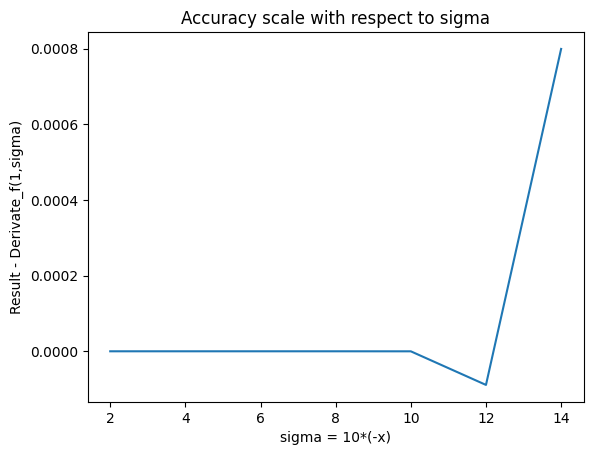

In [34]:
#Esercizio 6
import matplotlib.pyplot as plt

def f(x):
    return x*(x-1)

def derivate_f(x,sigma):
    return (f(x+sigma)-f(x))/sigma

sigma = 0.01
x = 1
print('Code Result:       ', derivate_f(x,sigma))
result = sigma + 1;
print('Analytical Result: ', result, '\n')

diff = [result - derivate_f(x,sigma)]

for sigma in [10**-4, 10**-6, 10**-8, 10**-10, 10**-12, 10**-14]:
    print('Code Result for sigma = ', sigma, ': ', derivate_f(x,sigma))
    print('Correct Analyticsl Result:       ', sigma + 1, '\n')
    diff.append(sigma + 1 - derivate_f(x,sigma))

plt.plot([2,4,6,8,10,12,14], diff)
plt.xlabel('sigma = 10*(-x)')
plt.ylabel('Result - Derivate_f(1,sigma)')
plt.title('Accuracy scale with respect to sigma')
plt.show

In [25]:
# Esercizio 7
import math
import timeit

def semicerchioUnitario(x):
    return math.sqrt(2*x - x*x)

def semicircleIntegral(N):
    I = 0
    for k in range(N):
        I += (2/N)*semicerchioUnitario(2*k/N)
    return I 

N = 10000000
print('The integral of the semicircle of radius 1 is: ', semicircleIntegral(N))
print('Correct Analytical Result: ', math.pi/2)

t = timeit.timeit(stmt = 'lambda N:semicircleIntegral(N)')
print('The computation runs for ', str(t), ' seconds')


The integral of the semicircle of radius 1 is:  1.570796326742361
Correct Analytical Result:  1.5707963267948966
The computation runs for  0.0735561559999951  seconds


In [22]:
#while t < 1:
#    N = N*10
#    t = timeit.timeit(stmt = 'lambda N:semicircleIntegral(N)')
    
#print('With N = ', str(N), 'the computation runs for: ', str(t),' seconds')